## Feature Exploratory Data Analysis (EDA)

This notebook explores customer-level features generated in Phase 4.
The goal is to understand how customer behavior relates to churn and
to validate the engineered features used for modeling.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
pd.set_option("display.max_columns", None)

print("Libraries loaded successfully")


Libraries loaded successfully


In [2]:
df = pd.read_csv("../data/processed/customer_features.csv")

print(f"Dataset Shape: {df.shape}")
df.head()


Dataset Shape: (4312, 22)


,customerid,first_purchase,last_purchase,frequency,total_transactions,monetary_value,avg_order_value,total_quantity,avg_quantity_per_txn,unique_products,unique_invoices,min_price,max_price,avg_price,price_std,country_count,recency_days,customer_tenure_days,days_since_first_purchase,days_since_last_purchase,avg_days_between_purchases,churn
0,12346.0,2009-12-14 08:34:00,2010-06-28 13:53:00,11,33,206.36,6.253333,70,2.121212,26,11,1.00,7.49,6.253333,1.682971,1,164,196,360,164,17.818182,1
1,12347.0,2010-10-31 14:20:00,2010-12-07 14:57:00,2,71,162.95,2.295070,828,11.661972,70,2,0.38,12.75,2.295070,1.869887,1,2,37,39,2,18.500000,0
2,12348.0,2010-09-27 14:59:00,2010-09-27 14:59:00,1,20,14.39,0.719500,373,18.650000,20,1,0.29,1.45,0.719500,0.431856,1,73,0,73,73,0.000000,0
3,12349.0,2010-04-29 13:20:00,2010-10-28 08:23:00,3,102,875.34,8.581765,993,9.735294,90,3,0.42,250.00,8.581765,31.299379,1,42,181,224,42,60.333333,0
4,12351.0,2010-11-29 15:23:00,2010-11-29 15:23:00,1,21,49.46,2.355238,261,12.428571,21,1,0.42,12.75,2.355238,2.735753,1,10,0,10,10,0.000000,0


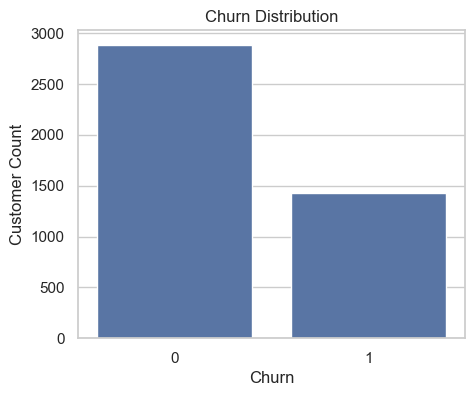

Churn Percentage:
churn
0    66.91
1    33.09
Name: proportion, dtype: float64


In [10]:
plt.figure(figsize=(5,4))
sns.countplot(x="churn", data=df)
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Customer Count")
plt.show()

print("Churn Percentage:")
print((df["churn"].value_counts(normalize=True) * 100).round(2))


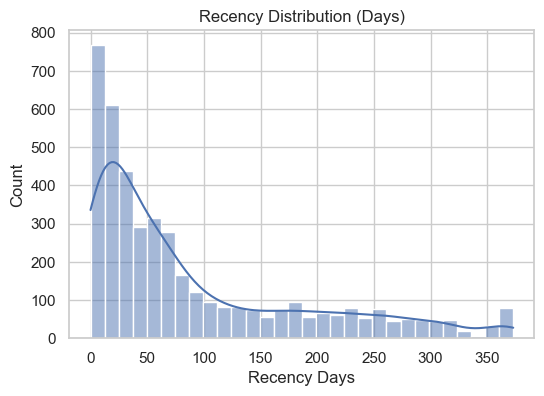

In [11]:
plt.figure(figsize=(6,4))
sns.histplot(df["recency_days"], bins=30, kde=True)
plt.title("Recency Distribution (Days)")
plt.xlabel("Recency Days")
plt.show()


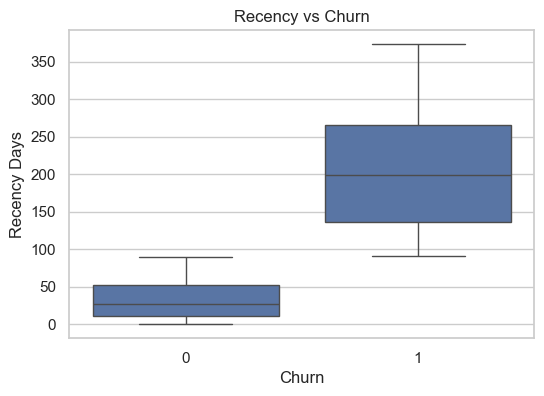

In [12]:
plt.figure(figsize=(6,4))
sns.boxplot(x="churn", y="recency_days", data=df)
plt.title("Recency vs Churn")
plt.xlabel("Churn")
plt.ylabel("Recency Days")
plt.show()


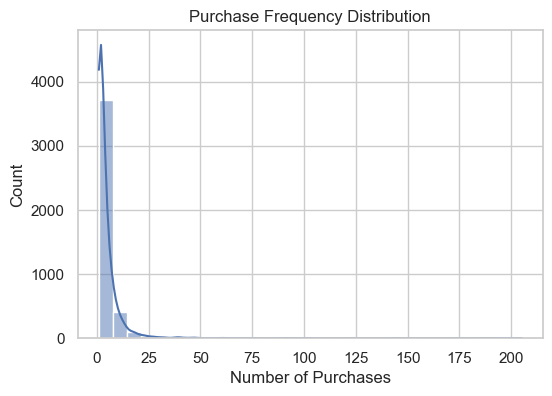

In [13]:
plt.figure(figsize=(6,4))
sns.histplot(df["frequency"], bins=30, kde=True)
plt.title("Purchase Frequency Distribution")
plt.xlabel("Number of Purchases")
plt.show()


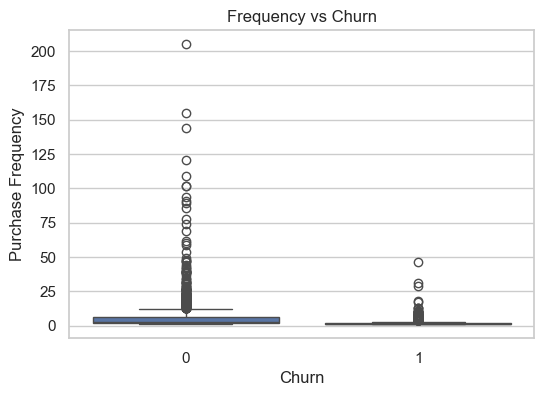

In [14]:
plt.figure(figsize=(6,4))
sns.boxplot(x="churn", y="frequency", data=df)
plt.title("Frequency vs Churn")
plt.xlabel("Churn")
plt.ylabel("Purchase Frequency")
plt.show()


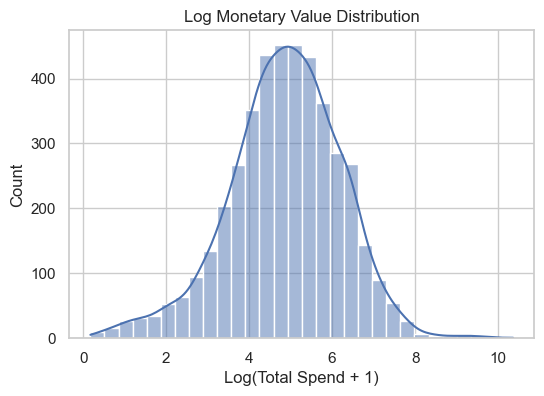

In [15]:
plt.figure(figsize=(6,4))
sns.histplot(np.log1p(df["monetary_value"]), bins=30, kde=True)
plt.title("Log Monetary Value Distribution")
plt.xlabel("Log(Total Spend + 1)")
plt.show()


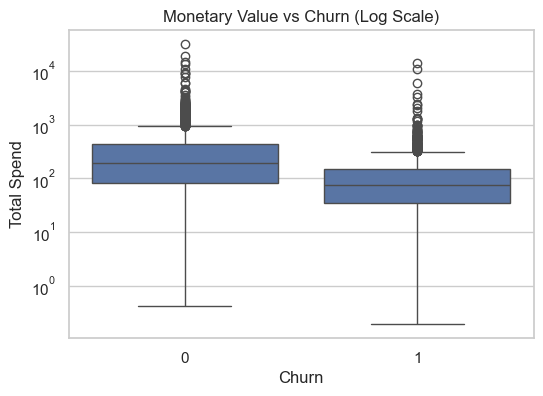

In [16]:
plt.figure(figsize=(6,4))
sns.boxplot(x="churn", y="monetary_value", data=df)
plt.yscale("log")
plt.title("Monetary Value vs Churn (Log Scale)")
plt.xlabel("Churn")
plt.ylabel("Total Spend")
plt.show()


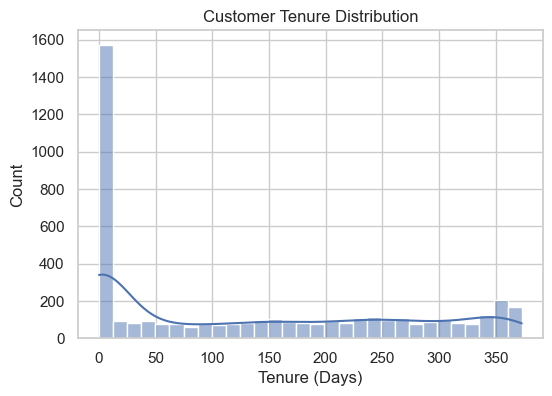

In [17]:
plt.figure(figsize=(6,4))
sns.histplot(df["customer_tenure_days"], bins=30, kde=True)
plt.title("Customer Tenure Distribution")
plt.xlabel("Tenure (Days)")
plt.show()


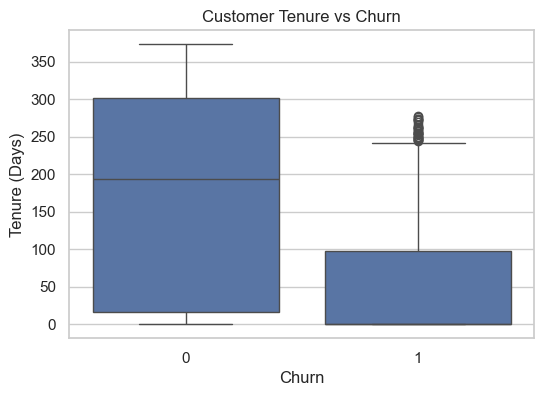

In [18]:
plt.figure(figsize=(6,4))
sns.boxplot(x="churn", y="customer_tenure_days", data=df)
plt.title("Customer Tenure vs Churn")
plt.xlabel("Churn")
plt.ylabel("Tenure (Days)")
plt.show()


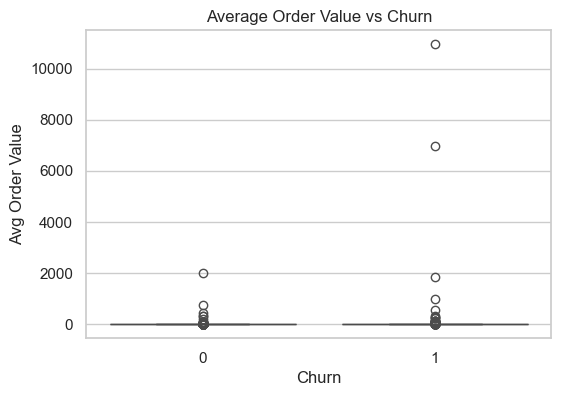

In [19]:
plt.figure(figsize=(6,4))
sns.boxplot(x="churn", y="avg_order_value", data=df)
plt.title("Average Order Value vs Churn")
plt.xlabel("Churn")
plt.ylabel("Avg Order Value")
plt.show()


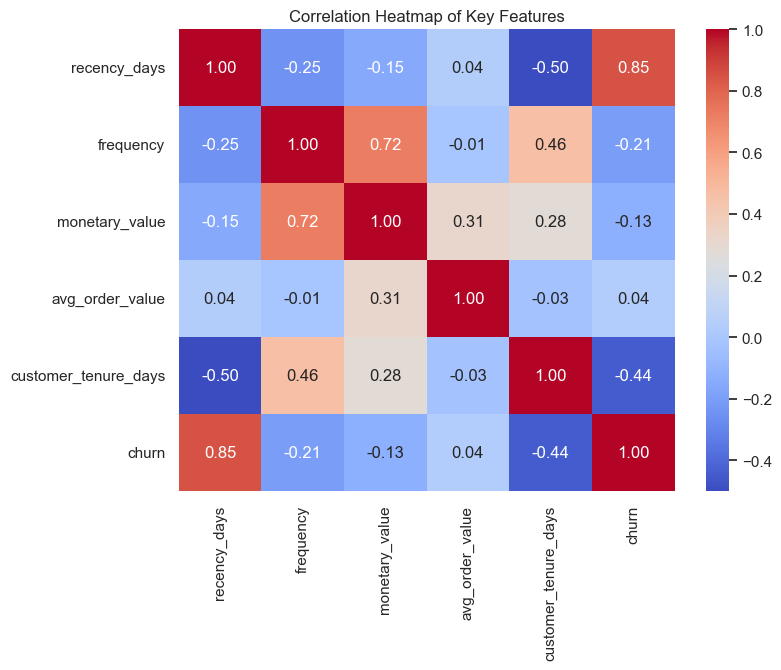

In [20]:
key_features = [
    "recency_days",
    "frequency",
    "monetary_value",
    "avg_order_value",
    "customer_tenure_days",
    "churn"
]

plt.figure(figsize=(8,6))
sns.heatmap(
    df[key_features].corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Correlation Heatmap of Key Features")
plt.show()


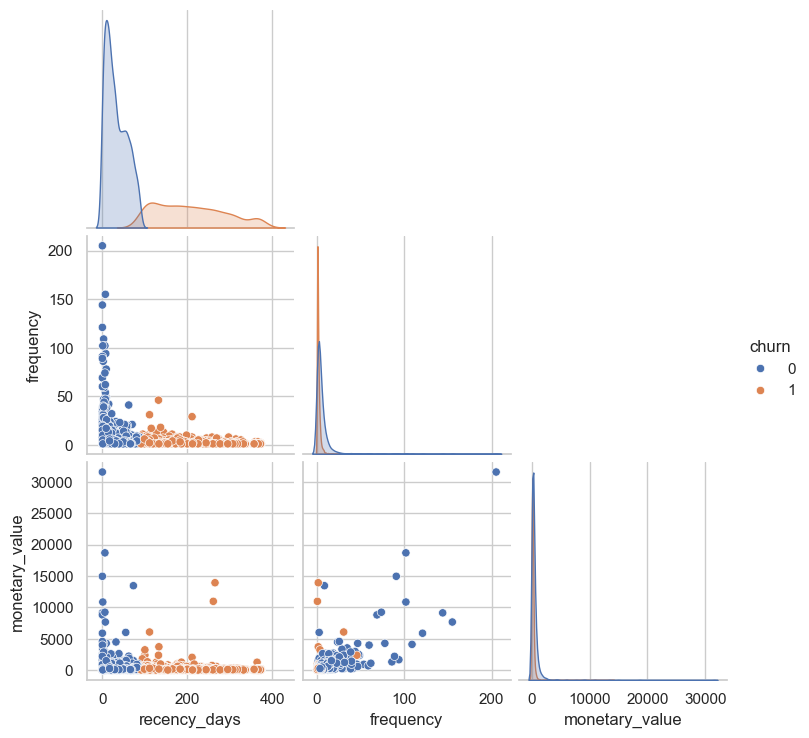

In [21]:
sns.pairplot(
    df[["recency_days", "frequency", "monetary_value", "churn"]],
    hue="churn",
    corner=True
)
plt.show()


In [22]:
df.groupby("churn")[key_features].mean().round(2)


,recency_days,frequency,monetary_value,avg_order_value,customer_tenure_days,churn
churn,,,,,,
0,32.12,5.64,384.09,4.80,175.50,0.0
1,207.54,2.07,152.24,20.11,50.09,1.0


## Key Insights from Feature EDA

- Churned customers have higher recency values
- Higher purchase frequency and spending correlate with retention
- Long-tenured customers are less likely to churn
- RFM-based features show strong predictive signals

These findings validate the feature engineering approach and
support the strong performance observed during modeling.
